### Contents
1. Analysis of preprocessing problem
    * Understanding requirements
2. Data preprocessing
    * Messing values
    * Feature selection
3. Logistic Regression
4. Decision Tree
5. Random Forest
6. Neural Networks
7. Model Evaluation

### Problem setting


The task consists of analyzing the “caravan” dataset from an insurance company , which  contains about 86 different kinds of information about its customers, then the suitable model must be inferred from the data in order to uncover all the customers that could be interested in the insurance.

In [35]:
### import libraries 
import pandas as pd
import numpy as np
from IPython.display import display # to display multiple dataframes in one cell
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,f1_score,auc,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler ## for standardizing the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

## Section 1:
1. in this section multiple improvments and analysis on the data are performed,these can be summarized as follows:
  * the info file has been read then used to extract the name of each column as well as its meaning
  * multiple statistical analysis are performed like the first, second and third quartile of each column as well as its min and  max
  * correlation between features has been plotted,then the most correlated are dropped
  * data has been splited into training and test and then standardized 

#### Understanding the data


In [36]:
## getting the names of columns
info_names = ['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic',
       'Protestant', 'Other religion', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles',
       'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars',
       'No car', 'National Health Service', 'Private health insurance', 'Income < 30.000', 'Income 30-45.000', 'ncome 45-75.000',
       'Income 75-122.000', 'Income >123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance',
       ' Contribution third party insurane', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies',
       'Contribution tractor policies', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances', 'Contribution private accident insurance policies', 'Contribution family accidents insurance policies',
       'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies',
       'Contribution social security insurance policies', 'Number of private third party insurance', ' Number of third party insurance (firms)', 'Number of third party insurane (agriculture)', 'Number of car policies', 'Number of delivery van policies',
       'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies',
       'Number of life insurances', 'number of private accident insurance policies', ' Number of family accidents insurance policies', ' Number of disability insurance policies', 'Number of fire policies', 'Number of surfboard policies',
       'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies', 'CARAVAN']

In [37]:
#### open and read the info_file, then return a list of names for the numbered columns 
col_names = []
with open('caravan.info','r',newline = '\n') as f:
    info_file = f.read().strip().splitlines()
    for line in info_file[3:89]:
        if len(line.split(' ')) > 2 :
            col_names.append(line.split(' ')[1])
    f.close()

In [38]:
### read the file and set the name of columns  corresponding to each number in the file
train  = pd.read_csv('caravan.train',sep = "\t",names = col_names)
validation = pd.read_csv('caravan.test',sep = "\t",names = col_names)

In [39]:
### set pandas so that all table entries will be displayed with only 2 decimals ( for describe function)
pd.set_option('float_format','{0:.2f}'.format)
# set pandas so that the whole table can be displayed
pd.set_option('display.max_columns', None)
print('some infos about the caravan file :\n {info}'.format(info = info_file[3:13]))

some infos about the caravan file :
 ['1 MOSTYPE Customer Subtype see L0', '2 MAANTHUI Number of houses 1 – 10', '3 MGEMOMV Avg size household 1 – 6', '4 MGEMLEEF Avg age see L1', '5 MOSHOOFD Customer main type see L2', '6 MGODRK Roman catholic see L3', '7 MGODPR Protestant ...', '8 MGODOV Other religion', '9 MGODGE No religion', '10 MRELGE Married']


In [40]:
### meaning of each column's name
names_def = pd.DataFrame(data = [info_names], columns=col_names)
names_def

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income < 30.000,Income 30-45.000,ncome 45-75.000,Income 75-122.000,Income >123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance,Contribution third party insurane,Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurane (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN


In [41]:
### display the head of data
display(train.head())

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
### display infos about data 
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   5822 non-null   int64
 1   MAANTHUI  5822 non-null   int64
 2   MGEMOMV   5822 non-null   int64
 3   MGEMLEEF  5822 non-null   int64
 4   MOSHOOFD  5822 non-null   int64
 5   MGODRK    5822 non-null   int64
 6   MGODPR    5822 non-null   int64
 7   MGODOV    5822 non-null   int64
 8   MGODGE    5822 non-null   int64
 9   MRELGE    5822 non-null   int64
 10  MRELSA    5822 non-null   int64
 11  MRELOV    5822 non-null   int64
 12  MFALLEEN  5822 non-null   int64
 13  MFGEKIND  5822 non-null   int64
 14  MFWEKIND  5822 non-null   int64
 15  MOPLHOOG  5822 non-null   int64
 16  MOPLMIDD  5822 non-null   int64
 17  MOPLLAAG  5822 non-null   int64
 18  MBERHOOG  5822 non-null   int64
 19  MBERZELF  5822 non-null   int64
 20  MBERBOER  5822 non-null   int64
 21  MBERMIDD  5822 non-null   int64
 22  

None

In [43]:
### describe the data
train_describe = train.describe()
## set column's infos instead of the the column's names
train_describe.columns= info_names
display(train_describe)

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income < 30.000,Income 30-45.000,ncome 45-75.000,Income 75-122.000,Income >123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance,Contribution third party insurane,Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurane (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN
count,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00,5822.00
mean,24.25,1.11,2.68,2.99,5.77,0.70,4.63,1.07,3.26,6.18,0.88,2.29,1.89,3.23,4.30,1.46,3.35,4.57,1.90,0.40,0.52,2.90,2.22,2.31,1.62,1.61,2.20,3.76,1.07,4.24,4.77,6.04,1.32,1.96,6.28,2.73,2.57,3.54,2.73,0.80,0.20,3.78,4.24,0.77,0.04,0.07,2.97,0.05,0.18,0.01,0.02,0.09,0.01,0.22,0.19,0.01,0.02,0.02,1.83,0.00,0.02,0.03,0.02,0.05,0.40,0.01,0.02,0.56,0.01,0.04,0.00,0.01,0.03,0.01,0.07,0.08,0.01,0.01,0.00,0.57,0.00,0.01,0.03,0.01,0.01,0.06
std,12.85,0.41,0.79,0.81,2.86,1.00,1.72,1.02,1.60,1.91,0.97,1.72,1.80,1.62,2.01,1.62,1.76,2.30,1.80,0.78,1.06,1.84,1.73,1.69,1.72,1.33,1.53,1.94,1.30,3.09,3.09,1.55,1.20,1.60,1.98,1.98,2.09,1.88,1.93,1.16,0.55,1.32,2.01,0.96,0.36,0.50,2.92,0.53,0.90,0.24,0.21,0.60,0.23,0.81,0.90,0.21,0.19,0.38,1.88,0.04,0.27,0.16,0.20,0.41,0.49,0.13,0.14,0.60,0.13,0.23,0.06,0.13,0.24,0.12,0.27,0.38,0.07,0.08,0.08,0.56,0.02,0.08,0.21,0.09,0.12,0.24
min,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

#### Data preprocessing

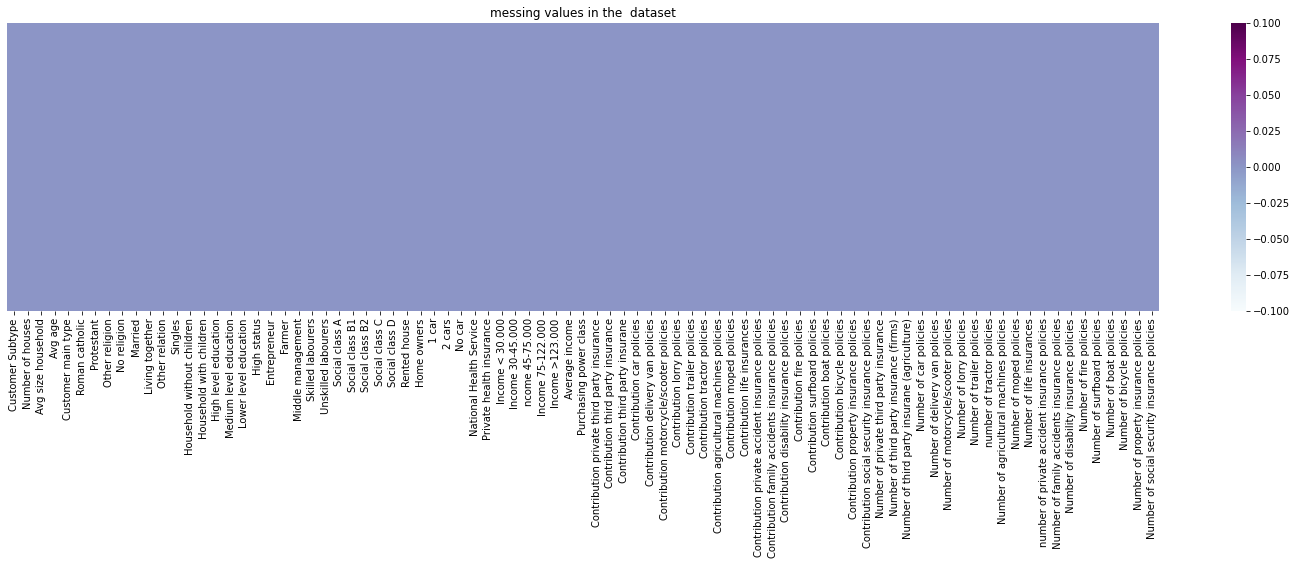

In [44]:
### check if there is any messing value
df = pd.concat([train,validation])
fig = plt.figure(figsize=(20,20))
ax0 = fig.add_axes([0,0,1,0.2])
sns.heatmap(df.iloc[:,:-1].isna(),annot = False,xticklabels=info_names[:-1],yticklabels=False,ax = ax0,cmap ='BuPu')
ax0.set_title('messing values in the  dataset')
plt.show()
## alternative method to check if there are any messing values
# df.iloc[:,:-1].isna().sum(axis = 0).unique()
### there are no messing values in train

* the correlation between features

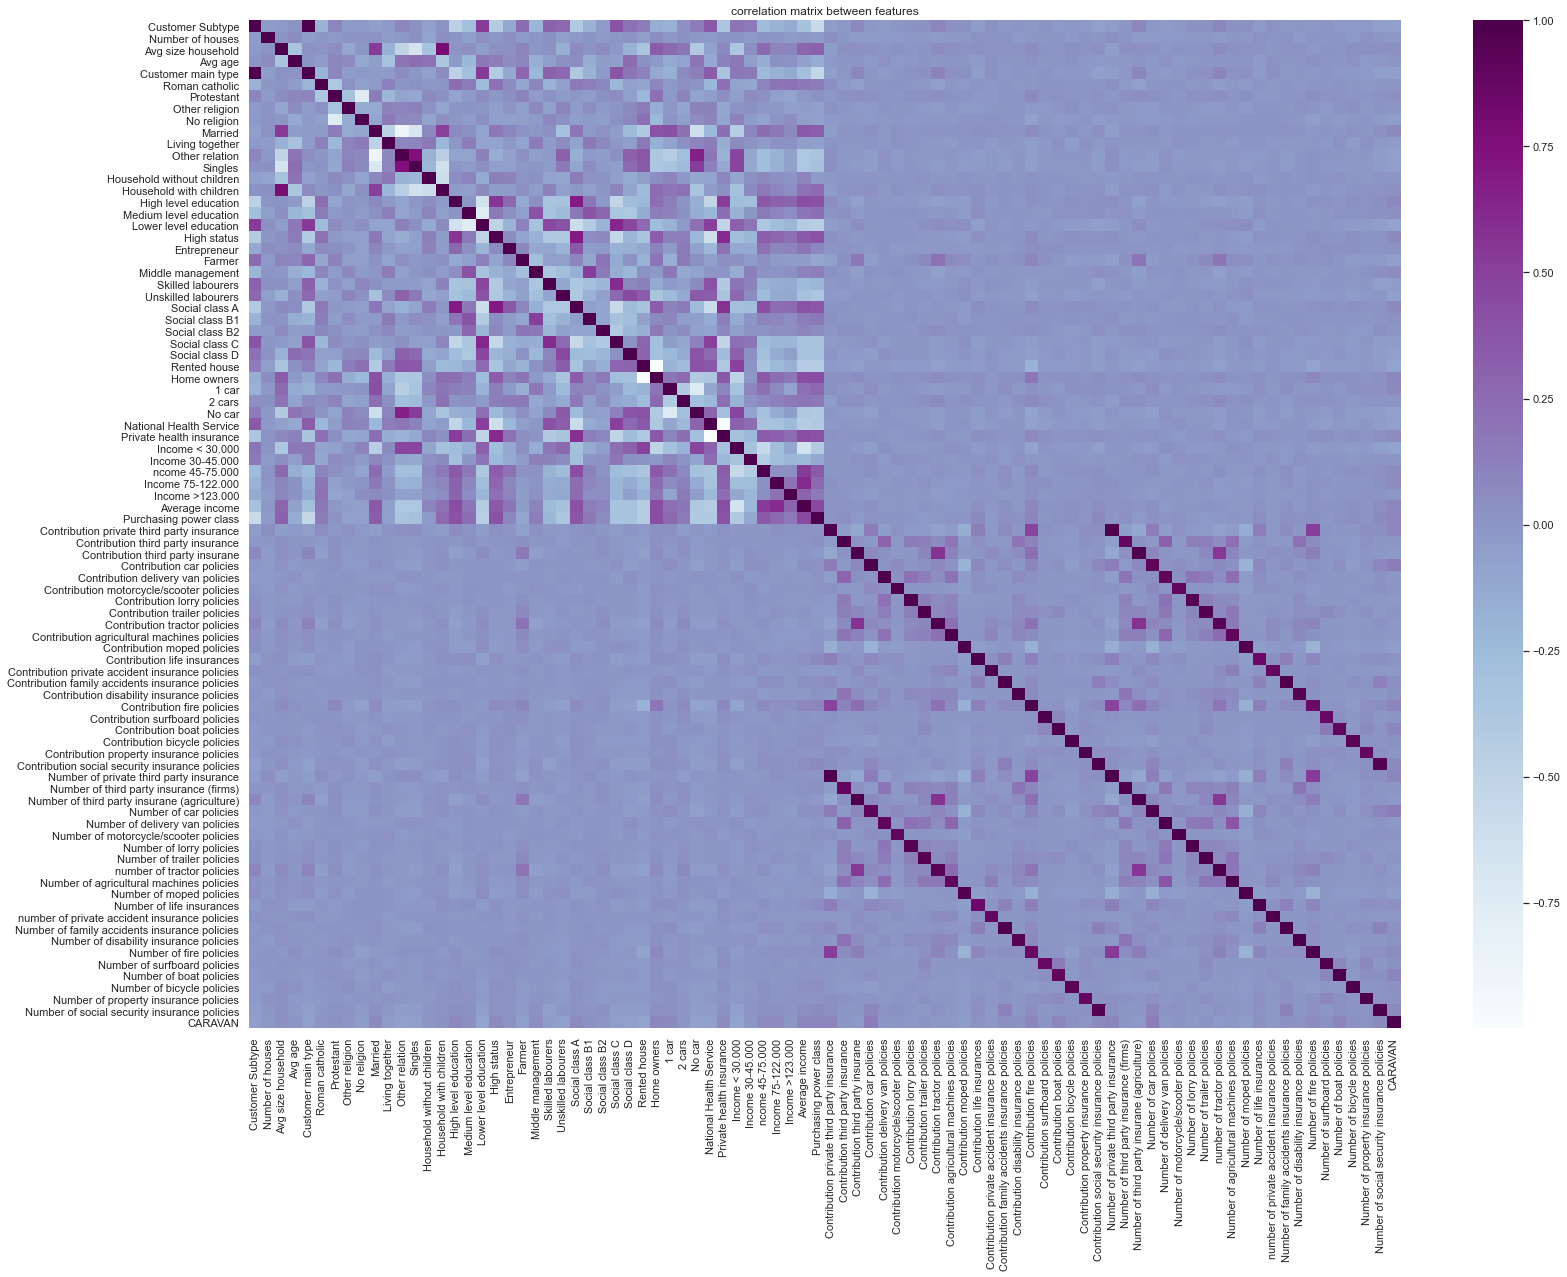

In [45]:
fig = plt.figure(figsize =(20,20))
sns.set(style='darkgrid')
## set the axes width, hight ,..
ax1 = fig.add_axes([0,1,1,0.7])
# plotting the correlation between features using the heatmap
ax1.set_title('correlation matrix between features')
sns.heatmap(train.corr(),ax = ax1,cmap = 'BuPu',xticklabels=info_names,yticklabels=info_names)
plt.show()

* finds all features that are highly correlated

In [46]:
## correlation matrix
corr_matrix = pd.concat([train,validation]).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(shape =corr_matrix.shape),k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
column_drop = [column for column in upper.columns if any(upper[column] > .9)]
column_drop = column_drop[1:]
print('the columns to drop are: {}'.format(names_def.loc[0,column_drop].values))

the columns to drop are: ['Home owners' 'Private health insurance'
 'Number of private third party insurance'
 ' Number of third party insurance (firms)'
 'Number of third party insurane (agriculture)' 'Number of car policies'
 'Number of motorcycle/scooter policies' 'Number of lorry policies'
 'Number of trailer policies' 'number of tractor policies'
 'Number of agricultural machines policies' 'Number of moped policies'
 ' Number of family accidents insurance policies'
 ' Number of disability insurance policies' 'Number of surfboard policies'
 'Number of bicycle policies'
 'Number of social security insurance policies']


In [47]:
## drop the correlated columns for training data as well as validation data
train.drop(columns = column_drop,inplace = True)
validation.drop(columns=column_drop,inplace = True)
### new shape of the training data set
print('the new shape of trainig dataset is {}'.format(train.shape))
print('the new shape of validation dataset is {}'.format(validation.shape))

the new shape of trainig dataset is (5822, 69)
the new shape of validation dataset is (4000, 69)


* train and validation datasets after dropping all correlated features

In [48]:
### input and ouptput data after dropping the correlated columns
validation_input = validation.iloc[:,:-1]
validation_ouptut = validation.iloc[:,-1]
train_input = train.iloc[:,:-1]
train_output = train.iloc[:,-1]

In [49]:
### meaning of each column name after dropping the corrolated columns
columns_name = names_def.drop(columns = column_drop).iloc[0,:].values

* plot the class distribution

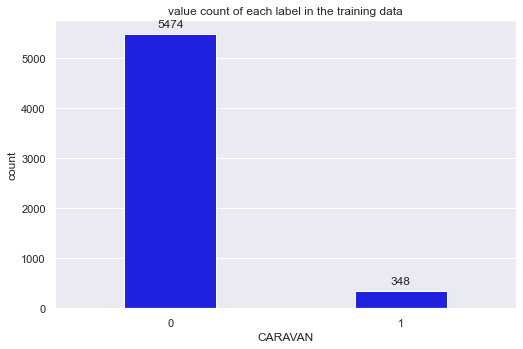

In [50]:
### set the figure's parameters
fig = plt.figure(figsize =(16,16))
sns.set(style='darkgrid')
ax2 = fig.add_axes([0,0,0.4,0.25])
# plot the histogram of y_train to check the counts of each label ('the class distribution')
sns.countplot(x=train_output,color = 'blue',ax = ax2)
### annotate the bars
for rect in ax2.patches:
    height = rect.get_height()
    ax2.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 
ax2.set_title('value count of each label in the training data')
## change the width of the bars
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax2,0.4)
plt.show()
## from the plot "value count of each label in y_train" it's obvious that the  class distribution is imbalanced 

In [51]:
## split the training data into training and test
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.3, random_state=42)

In [52]:
### standardizing X_train and X_test as well
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)

## Section 2:
1. In this section different machine learning models have been investigated and compared, the steps can be listed as follows
* Logistic Regression, Decision Tree, Random Forest and the Artificial Neural Network  have  been implemented.
* their outcomes have been assessed through different metrics
* the best model has been chosen using nested cross validation 
* the labels of the validation set are predicted using the best model 

#### Logistic Regression


              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1628
           1       0.17      0.62      0.27       119

    accuracy                           0.77      1747
   macro avg       0.57      0.70      0.57      1747
weighted avg       0.91      0.77      0.82      1747

the accuracy score of logistic Regression is: 0.77
the f1 score of Logistic Regression is: 0.27
the recall score of Logistic Regression is: 0.62
ROC curve (AUC = 0.41)


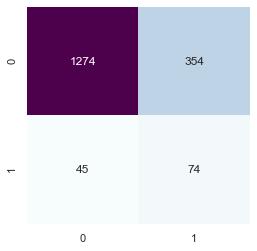

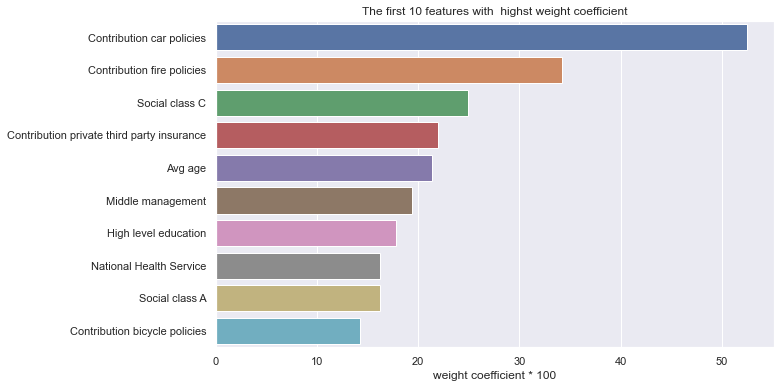

In [64]:
#### run the logistic regression model
clf_log = LogisticRegression(max_iter=500,C = 0.01,class_weight={0:1,1:14})
clf_log.fit(X_train_std,y_train)
clf_log_pred = clf_log.predict(X_test_std)

### print the classification report 
print(classification_report(y_test,clf_log_pred))

### the accuracy of the model
print('the accuracy score of logistic Regression is: {:.2f}'.format(accuracy_score(y_test,clf_log_pred)))
print('the f1 score of Logistic Regression is: {:.2f}'.format(f1_score(y_test,clf_log_pred)))
print('the recall score of Logistic Regression is: {:.2f}'.format(recall_score(y_test,clf_log_pred)))

## AUC
y_score = clf_log.predict_proba(X_test_std).max(axis = 1)
fpr, tpr,_ = roc_curve(y_test,y_score)
print('ROC curve (AUC = {:.2f})'.format(auc(fpr,tpr)))

### display the confusion matrix
fig = plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test,clf_log_pred),annot = True,cbar = False,fmt = 'g',cmap ='BuPu')
plt.show()

#### get the weight's coefficient
weights_log  = pd.DataFrame(index = columns_name[:-1], columns =['weights_log'], data = (clf_log.coef_*1e2).T)
weights_log = weights_log.sort_values('weights_log',ascending = False).iloc[:10,:]
### print the heightst weight's coefficient in form of histograms
fig = plt.figure(figsize = (10,6))
sns.barplot(y = weights_log.index,x ="weights_log",data = weights_log,orient = 'h')
plt.title("The first 10 features with  highst weight coefficient")
plt.xlabel("weight coefficient * 100")
plt.show()

#### Random forest 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1628
           1       0.19      0.04      0.07       119

    accuracy                           0.92      1747
   macro avg       0.56      0.51      0.51      1747
weighted avg       0.88      0.92      0.90      1747

the accuracy score of Random forest is: 0.92
the f1 score of Random forest is: 0.07
the recall score of Random forest is: 0.04 
ROC curve (AUC = 0.28)


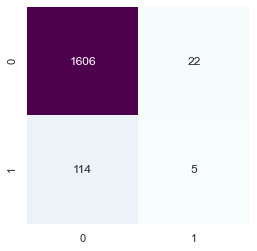

In [33]:
clf_rf = RandomForestClassifier(criterion='entropy',n_estimators=100,min_samples_split=2)
##n_estimators number of trees ('models')
clf_rf.fit(X_train_std,y_train)
clf_rf_pred = clf_rf.predict(X_test_std)
### print the classification report 
print(classification_report(y_test,clf_rf_pred))
### display the confusion matrix
fig = plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test,clf_rf_pred),annot = True,cbar = False,fmt = 'g',cmap = 'BuPu')
### the accuracy of the model
print('the accuracy score of Random forest is: {:.2f}'.format(accuracy_score(y_test,clf_rf_pred)))
print('the f1 score of Random forest is: {:.2f}'.format(f1_score(y_test,clf_rf_pred)))
print('the recall score of Random forest is: {:.2f} '.format(recall_score(y_test,clf_rf_pred)))
### AUC
y_score = clf_rf.predict_proba(X_test_std).max(axis = 1)
fpr, tpr,_ = roc_curve(y_test,y_score)
print('ROC curve (AUC = {:.2f})'.format(auc(fpr,tpr)))

#### Decision tree

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1628
           1       0.13      0.11      0.12       119

    accuracy                           0.89      1747
   macro avg       0.53      0.53      0.53      1747
weighted avg       0.88      0.89      0.89      1747

the accuracy score of Decision tree is: 0.89
the f1 score of Decision tree is: 0.12
the recall score of Decision tree is: 0.11
ROC curve (AUC = 0.50)


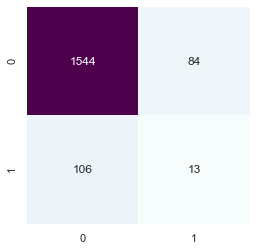

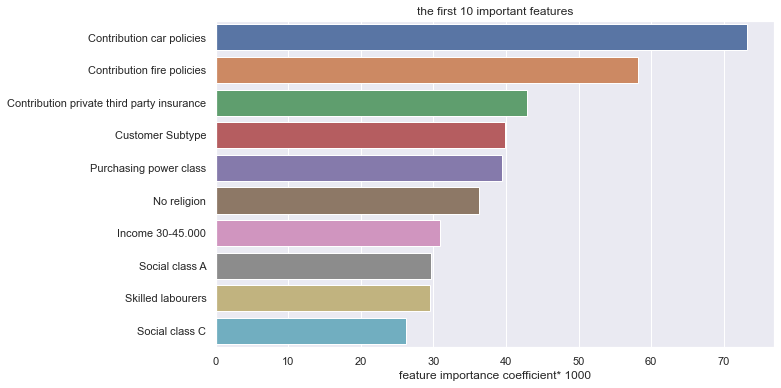

In [34]:
clf_dt = DecisionTreeClassifier(criterion='entropy',max_depth=75)
clf_dt.fit(X_train_std,y_train)
clf_dt_pred = clf_dt.predict(X_test_std)
### print the classification report 
print(classification_report(y_test,clf_dt_pred))
### display the confusion matrix
fig = plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test,clf_dt_pred),annot = True,cbar = False,fmt = 'g',cmap = 'BuPu')
### the accuracy of the model
print('the accuracy score of Decision tree is: {:.2f}'.format(accuracy_score(y_test,clf_dt_pred)))
print('the f1 score of Decision tree is: {:.2f}'.format(f1_score(y_test,clf_dt_pred)))
print('the recall score of Decision tree is: {:.2f}'.format(recall_score(y_test,clf_dt_pred)))

### AUC
y_score = clf_dt.predict_proba(X_test_std).max(axis = 1)
fpr, tpr,_ = roc_curve(y_test,y_score)
print('ROC curve (AUC = {:.2f})'.format(auc(fpr,tpr)))

### plot the feature importance in form of histograms
feature_imp  = pd.DataFrame(index = columns_name[:-1], columns =['feature_importances'], data = clf_dt.feature_importances_*1e3)
feature_imp = feature_imp.sort_values('feature_importances',ascending = False).iloc[:10,:]
fig = plt.figure(figsize = (10,6))
sns.barplot(y = feature_imp.index,x ='feature_importances',data = feature_imp,orient = 'h')
plt.title("the first 10 important features")
plt.xlabel("feature importance coefficient* 1000")
plt.show()

#### Support-vector machines 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1628
           1       0.19      0.43      0.27       119

    accuracy                           0.84      1747
   macro avg       0.57      0.65      0.59      1747
weighted avg       0.90      0.84      0.87      1747

the accuracy score of SVM is: 0.84
the f1 score of SVM is: 0.27
the recall score of SVM is: 0.43
ROC curve (AUC = 0.74)


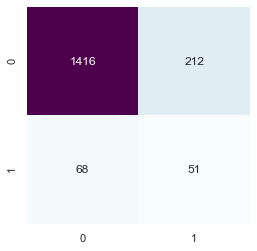

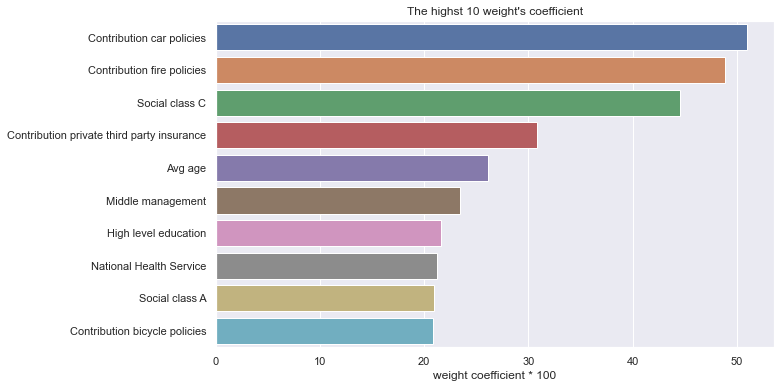

In [35]:
clf_svm = SVC(C = 1,class_weight={0:0.1,1:0.9},kernel = 'linear')
clf_svm.fit(X_train_std,y_train)
clf_svm_pred = clf_svm.predict(X_test_std)
### print the classification report 
print(classification_report(y_test,clf_svm_pred))
### display the confusion matrix
fig = plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test,clf_svm_pred),annot = True,cbar = False,fmt = 'g',cmap = 'BuPu')
### the accuracy of the model
print('the accuracy score of SVM is: {:.2f}'.format(accuracy_score(y_test,clf_svm_pred)))
print('the f1 score of SVM is: {:.2f}'.format(f1_score(y_test,clf_svm_pred)))
print('the recall score of SVM is: {:.2f}'.format(recall_score(y_test,clf_svm_pred)))
### AUC
y_score = clf_svm.decision_function(X_test_std)
fpr, tpr,_ = roc_curve(y_test,y_score)
print('ROC curve (AUC = {:.2f})'.format(auc(fpr,tpr)))

#### get the weight's coefficient
weights_svm  = pd.DataFrame(index = columns_name[:-1], columns =['weights_svm'], data = (clf_svm.coef_*1e2).T)
weights_svm = weights_svm.sort_values('weights_svm',ascending = False).iloc[:10,:]

### print the heightst weight's coefficient in form of histograms
fig = plt.figure(figsize = (10,6))
sns.barplot(y = weights_log.index,x ="weights_svm",data = weights_svm,orient = 'h')
plt.title("The highst 10 weight's coefficient")
plt.xlabel("weight coefficient * 100")
plt.show()

#### Artificial neural network

In [36]:
def base_model():
    input_shape = (X_train.shape[1],)
    model = Sequential()
    model.add(Dense(30,activation = 'relu',name = 'input_layer',input_shape = input_shape))
    model.add(Dense(20,activation = 'relu',name = 'h_layer1'))
    model.add(Dense(10,activation = 'relu',name = 'h_layer2'))
    model.add(Dense(2 , activation = 'softmax', name = 'output_layer'))
    model.compile(optimizer = 'adam', loss =  SparseCategoricalCrossentropy(),metrics=['accuracy'])
    model.summary()
    return model

In [37]:
model  = base_model()
epochs = 5
history = model.fit(X_train_std,y_train,verbose = 1,epochs = epochs,batch_size = 20,validation_data =(X_test_std,y_test),class_weight = {0:1,1:14})

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 30)                2070      
_________________________________________________________________
h_layer1 (Dense)             (None, 20)                620       
_________________________________________________________________
h_layer2 (Dense)             (None, 10)                210       
_________________________________________________________________
output_layer (Dense)         (None, 2)                 22        
Total params: 2,922
Trainable params: 2,922
Non-trainable params: 0
_________________________________________________________________
Train on 4075 samples, validate on 1747 samples
Epoch 1/5
4075/4075 [==============================] - 1s 257us/step - loss: 1.1783 - accuracy: 0.6751 - val_loss: 0.5996 - val_accuracy: 0.7396
Epoch 2/5
4075/4075 [==============================] - 1s

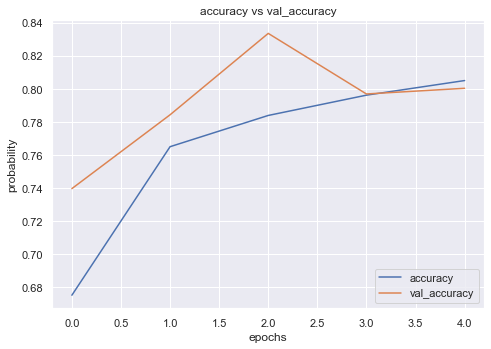

In [38]:
### history of the accuracy in function of number of epochs
history.history
fig  = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,0.5,0.5])
ax.plot(range(epochs),history.history['accuracy'])
ax.plot(range(epochs),history.history['val_accuracy'])
ax.set_xlabel('epochs')
ax.set_ylabel('probability')
ax.set_title('accuracy vs val_accuracy')
ax.legend(labels =['accuracy','val_accuracy'],loc = 'lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1628
           1       0.17      0.51      0.26       119

    accuracy                           0.80      1747
   macro avg       0.57      0.67      0.57      1747
weighted avg       0.90      0.80      0.84      1747

the accuracy score of Neural Network is: 0.80
the f1 score of Neural Network is: 0.26
the recall score of Neural Network is: 0.51
ROC curve (AUC = 0.37)


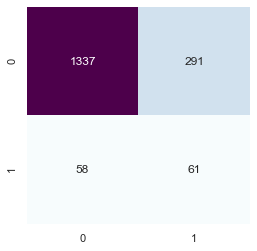

In [39]:
y_pred = np.argmax(model.predict(X_test_std),axis = 1)
y_pred_proba = model.predict(X_test_std).max(axis = 1)

## classification report 
print(classification_report(y_test,y_pred))

### the accuracy of the model
print('the accuracy score of Neural Network is: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('the f1 score of Neural Network is: {:.2f}'.format(f1_score(y_test,y_pred)))
print('the recall score of Neural Network is: {:.2f}'.format(recall_score(y_test,y_pred)))

## AUC Score 
print('ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
### confusion matrix 
fig = plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cbar = False,fmt = 'g',cmap = 'BuPu')
plt.show()


#### Model Selection


In [40]:
## standardizing the validation inputs
std = StandardScaler()
train_input_std = std.fit_transform(train_input)

In [41]:
## transform neural network to sklearn classifier
model_clf = KerasClassifier(build_fn = base_model)

In [58]:
#### here we have all the models as well as the parametres that we want to perform resp tweak
models = [(LogisticRegression(),dict(C = [1,0.01,0.1,10],max_iter = [500,1000],class_weight =[{0:1,1:16},{0:1,1:14},None]))
          ,(RandomForestClassifier(),dict(n_estimators = [100,300,500],max_depth = [None, 80,75,50],criterion = ['entropy']))
         ,(DecisionTreeClassifier(),dict(max_depth = [None, 80,75,50],criterion = ['entropy']))
         ,(SVC(),dict(C = [0.01,0.1,1],class_weight =[{0:1,1:16},{0:1,1:14},None],kernel = ['rbf','linear']))
         ,(model_clf,dict(epochs=[10,20]))]

### lists will contain the best score, best param, name of the best model and the best_estimator
best_score = []
best_param = []
best_estimator = []
names = []

## loop over all the models and their parameters
for estimator, param_grid in models:
    grid_model = GridSearchCV(estimator = estimator,param_grid = param_grid,scoring = 'f1',cv = 3)
    grid_model.fit(train_input_std,train_output)
    best_param.append(grid_model.best_params_)
    best_score.append(grid_model.best_score_)
    best_estimator.append(grid_model.best_estimator_)
    names.append(estimator)

### best score, best param, name of the best model and the best_estimator are returned
best_model_index = np.argmax(best_score)
best_model_name = names[best_model_index]
best_model_param = best_param[best_model_index]
best_model_score = best_score[best_model_index]
best_model_estimator = best_estimator[best_model_index]

## print the best estimator with its prameters and score
print('the best model is {name} whose parameters are {parameters} with  F1-score = {score:.2f}'
      .format(name = best_model_name,parameters = best_model_param,score = best_model_score))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 30)                2070      
_________________________________________________________________
h_layer1 (Dense)             (None, 20)                620       
_________________________________________________________________
h_layer2 (Dense)             (None, 10)                210       
_________________________________________________________________
output_layer (Dense)         (None, 2)                 22        
Total params: 2,922
Trainable params: 2,922
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3881/3881 [==============================] - 1s 144us/step - loss: 0.3827 - accuracy: 0.9072
Epoch 2/10
3881/3881 [==============================] - 0s 73us/step - loss: 0.2290 - accuracy: 0.9413
Epoch 3/10
3881/3881 [====================

5822/5822 [==============================] - 0s 65us/step - loss: 0.1738 - accuracy: 0.9418
Epoch 10/20
5822/5822 [==============================] - 0s 72us/step - loss: 0.1689 - accuracy: 0.9430
Epoch 11/20
5822/5822 [==============================] - 0s 73us/step - loss: 0.1636 - accuracy: 0.9443
Epoch 12/20
5822/5822 [==============================] - 0s 72us/step - loss: 0.1604 - accuracy: 0.9443
Epoch 13/20
5822/5822 [==============================] - 0s 73us/step - loss: 0.1563 - accuracy: 0.9459
Epoch 14/20
5822/5822 [==============================] - 0s 72us/step - loss: 0.1527 - accuracy: 0.9456
Epoch 15/20
5822/5822 [==============================] - 0s 69us/step - loss: 0.1487 - accuracy: 0.9469
Epoch 16/20
5822/5822 [==============================] - 0s 72us/step - loss: 0.1436 - accuracy: 0.9480
Epoch 17/20
5822/5822 [==============================] - 0s 70us/step - loss: 0.1410 - accuracy: 0.9493
Epoch 18/20
5822/5822 [==============================] - 0s 71us/step - loss

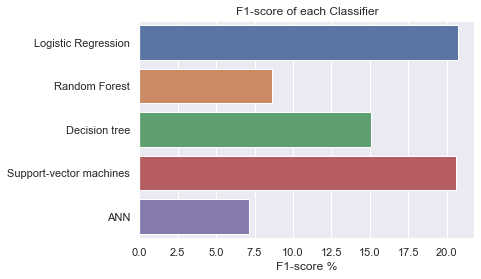

In [59]:
### plot the F1 score of each Classifier
model_names = ['Logistic Regression','Random Forest','Decision tree','Support-vector machines','ANN']
sns.barplot(x=np.array(best_score)*1e2,y = model_names)
plt.xlabel('F1-score %')
plt.title('F1-score of each Classifier')
plt.show()

#### Implementing the best model 

In [60]:
## standardize the validation data set
X_validation_std = std_scaler.fit_transform(validation_input)

In [61]:
#### prdict the labels using the logistic regression model as the best one
y_pred = best_model_estimator.predict(X_validation_std)

In [62]:
## replace CARAVAN column with the predicted labels
validation['CARAVAN']=y_pred

In [63]:
## counts of each class
validation['CARAVAN'].value_counts()

0    2853
1    1147
Name: CARAVAN, dtype: int64